In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("titanic_train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(["Name", "Ticket", "Cabin","PassengerId"], inplace=True, axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

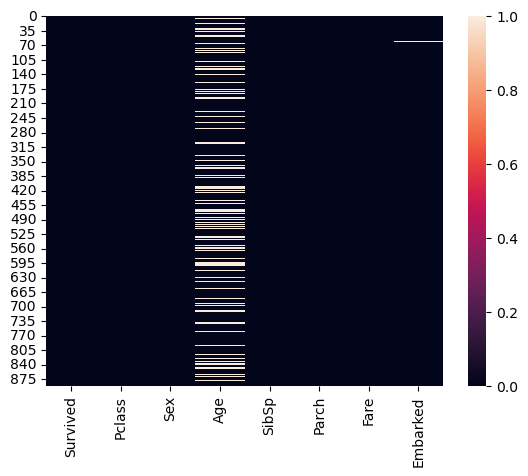

In [ ]:
sns.heatmap(data=df.isna())

<Axes: xlabel='Pclass', ylabel='Age'>

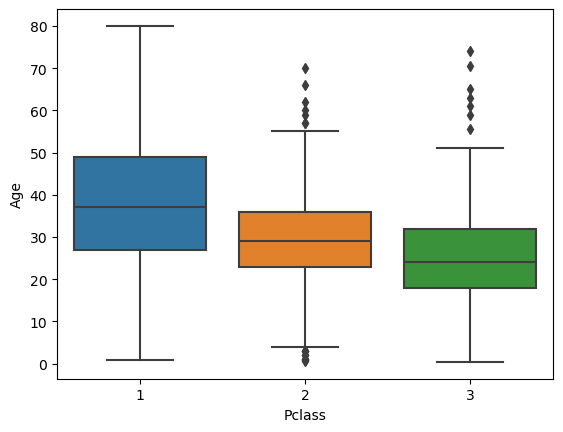

In [ ]:
sns.boxplot(data=df, x="Pclass", y="Age")

In [ ]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
quartiles = df.groupby('Pclass')['Age'].describe()

In [ ]:
quartiles

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [ ]:
def filAge(columns):
    if pd.isnull(columns[0]):
        if columns[1]==1:
            return 38
        elif columns[1]==2:
            return 29
        elif columns[1]==3:
            return 25
    else:
        return columns[0]
        
    


In [ ]:
df["NewAge"] = df[["Age","Pclass"]].apply(filAge, axis=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_9356\3558725049.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isnull(columns[0]):
C:\Users\saras\AppData\Local\Temp\ipykernel_9356\3558725049.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return columns[0]
C:\Users\saras\AppData\Local\Temp\ipykernel_9356\3558725049.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if columns[1]==1:
C:\Users\saras\AppData\Local\Temp\ipy

In [ ]:
df.drop("Age", axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,NewAge
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [ ]:
df = pd.get_dummies(data=df, columns=["Sex","Embarked"])

In [ ]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,NewAge,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,False,True,False,False,True
1,1,1,1,0,71.2833,38.0,True,False,True,False,False
2,1,3,0,0,7.9250,26.0,True,False,False,False,True
3,1,1,1,0,53.1000,35.0,True,False,False,False,True
4,0,3,0,0,8.0500,35.0,False,True,False,False,True


In [ ]:
X = df.drop("Survived", axis=1)

In [ ]:
y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X=X_train,y=y_train)

c:\Users\saras\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = lg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       175
           1       0.81      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [ ]:
print(confusion_matrix(y_test,predict))

[[154  21]
 [ 32  88]]


In [ ]:
roc_auc_score(y_test, predict)

0.8066666666666668

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=42, max_depth=500) 

In [ ]:
dtree.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=500, random_state=42)

In [ ]:
dtpredict = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, dtpredict))

[[138  37]
 [ 37  83]]


In [ ]:
print(classification_report(y_test, dtpredict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       175
           1       0.69      0.69      0.69       120

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



In [ ]:
roc_auc_score(y_test, dtpredict)

0.7401190476190477

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [ ]:
rfpredit = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, rfpredit))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       175
           1       0.76      0.69      0.72       120

    accuracy                           0.79       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.78      0.79      0.78       295



In [ ]:
print(confusion_matrix(y_test, rfpredit))

[[149  26]
 [ 37  83]]


In [2]:
roc_auc_score(y_test, rfpredit)
from imblearn.over_sampling import SMOTE

SMOTE(random_state=42)

NameError: name 'roc_auc_score' is not defined